In [3]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# required classification libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier

In [4]:
#Import data
train = pd.read_csv('C:/Users/School EC/Downloads/classification-predict-streamlit-template-0cac363f0638641ddb35a3d30c4756bf4d25e7ef/Train.csv') 
test = pd.read_csv('C:/Users/School EC/Downloads/classification-predict-streamlit-template-0cac363f0638641ddb35a3d30c4756bf4d25e7ef/Test.csv')

In [5]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [7]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [8]:
train.shape

(15819, 3)

In [9]:
X = train['message']
y = train['sentiment']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [11]:
# implement transform methods and fit on training test

text = Pipeline([('tfidf',TfidfVectorizer()),('classify',LinearSVC())])
text.fit(X_train,y_train)
text.score(X_test,y_test)*100

77.43362831858407

In [12]:
# check confusion matrix and F-1 score

from sklearn.metrics import confusion_matrix,classification_report,f1_score,precision_score,plot_confusion_matrix,recall_score

In [13]:
# predictions on x_test
y_pred = text.predict(X_test)

In [14]:
f1_score(y_test,y_pred,average="macro")*100

69.72808162613319

In [15]:
# Precision
precision_score(y_test,y_pred,average="macro")*100

74.68873688556523

In [17]:
y_pred.shape

(1582,)

In [18]:
# Recall
recall_score(y_test,y_pred,average="macro")*100

67.02562359455952

In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.73      0.53      0.61       132
           0       0.68      0.44      0.53       230
           1       0.79      0.88      0.83       840
           2       0.79      0.83      0.81       380

    accuracy                           0.77      1582
   macro avg       0.75      0.67      0.70      1582
weighted avg       0.77      0.77      0.76      1582



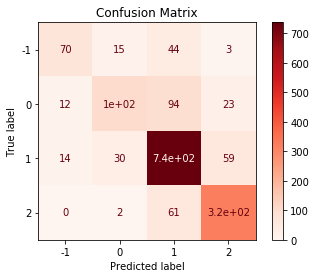

In [20]:
# Confusion matrix

# plot model's confusion matrix

plot_confusion_matrix(text, X_test, y_test, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [21]:
# clearly the model is doind well on classifying whether a tweet is "Pro" or "News"

In [22]:
# Now predict on the test data - which is the test file
# first extract the message column from it

newdata=test['message']

In [23]:
pred=text.predict(newdata)

In [24]:
# set a series of dataframe for the tweet id column be extracting itfrom the test set

tweetid = test.set_index('tweetid')

In [25]:
tweet_index = tweetid.index

In [26]:
Submission_Table = {'tweetid': tweet_index, 'sentiment':np.round(pred, 0)}
submission = pd.DataFrame(Submission_Table)
submission = submission[['tweetid', 'sentiment']]

In [28]:
submission.set_index('tweetid')

,sentiment
tweetid,
169760,1
35326,1
224985,1
476263,1
872928,0
...,...
895714,1
875167,1
78329,2


In [29]:
submission.to_csv("classytweets.csv",index  = False)